<p style="font-family:newtimeroman;font-size:300%;text-align:center;color:#FD700;"> Prediction of Patient Survival</p>

---
# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#85d07;">Author</p>**


<div id="badges" style="text-align: center;">
    <p style="font-size: 18px; background-color: #f8f9fa; color: #343a40; padding: 10px;">
       My name is Shahzaib Yaqoob, and I work as a Junior Data Scientist. My passion lies in using data to extract valuable insights, and make informed decisions. I am always eager to explore new areas of data science and apply innovative techniques to solve real-world problems. My commitment to learning and growth keeps me motivated to constantly improve my skills. 
    </p>
<div id="badges" style="text-align: center; background-color: #333; padding: 10px; margin-bottom: 10px;">
    <a href="https://www.linkedin.com/feed/?trk=404_page" target="_blank" rel="noopener noreferrer">
        <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn Badge"/>
    </a>
</div>


<div id="badges" style="text-align: center; background-color: #333; padding: 10px; margin-bottom: 10px;">
    <a href="https://github.com/mshahzaib4/mshahzaib4" target="_blank" rel="noopener noreferrer">
        <img src="https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white" alt="GitHub Badge"/>
    </a>
</div>

<div id="badges" style="text-align: center; background-color: #333; padding: 10px; margin-bottom: 10px;">
    <a href="https://www.kaggle.com/shahzaibmalik44" target="_blank" rel="noopener noreferrer">
        <img src="https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle Badge"/>
    </a>
</div>

<p style="font-size: 20px;font-family:newtimeroman; color: #007bff; text-align: center; margin-left: 10px;">Notebook Author: Muhammad Shahzaib Yaqoob 
 <p>


---

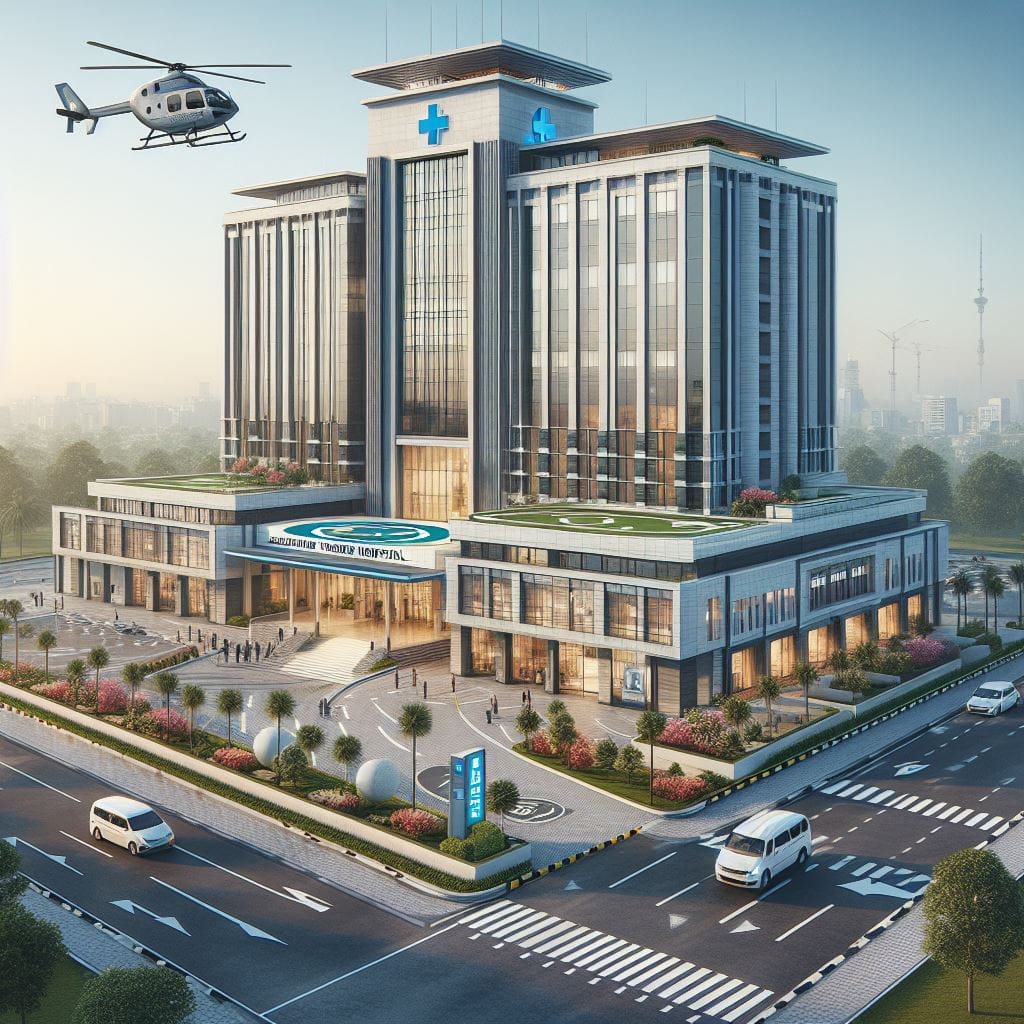

# **<p style="font-family:newtimeroman;font-size:130%;text-align:center;color:#85d07;">1. Data Preparation</p>**

### 1. Importing Libraries
- Import necessary Python libraries for data analysis and preprocessing.

### 2. Loading the Dataset
- Load the dataset into a pandas DataFrame for further analysis.

### 3. Analyzing Features and Types
- Examine the features (columns) of the dataset.
- Identify the data types of each feature (numeric, categorical, etc.).

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/patient/dataset.csv")

In [3]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [5]:
num_datatype =0
cat_datatype =0
other=0

for col in df.columns:
    if df[col].dtypes == "int64" or df[col].dtypes == "float64":
        num_datatype += 1
    elif df[col].dtypes == "object":
        cat_datatype += 1
print("Number of Numeric Columns:", num_datatype)
print("Number of Categorical Columns:", cat_datatype)

Number of Numeric Columns: 78
Number of Categorical Columns: 7


# **<p style="font-family:newtimeroman;font-size:130%;text-align:center;color:#85d07;">2. Exploratory Data Analysis (EDA)</p>**

### 1. Handling Missing Values

- **Dropping Rows or Columns:**
  - Remove rows or columns with a significant amount of missing data.
- **Imputation:**
  - Use imputation techniques to fill missing values.


### 2. Dropping Duplicate Rows
- Identify and drop duplicate rows from the dataset.

### 3. Data Cleaning
- **Drop Default Column:**
  - Remove the  column from the dataset.

### 4. Outlier Detection and Treatment
- **Check for Outliers:**
  - Visualize outliers using boxplots.
  - Use statistical methods to identify outliers.
- **Outlier Removal:**
  - Remove outliers from the dataset.

### 5. Data Visualization


In [6]:
df.isnull().sum().sort_values(ascending=False)


Unnamed: 83               91713
d1_potassium_max           9585
d1_potassium_min           9585
h1_mbp_noninvasive_min     9084
h1_mbp_noninvasive_max     9084
                          ...  
icu_stay_type                 0
icu_id                        0
elective_surgery              0
hospital_id                   0
hospital_death                0
Length: 85, dtype: int64

In [7]:

df.drop(["Unnamed: 83"],axis=1,inplace=True)

In [8]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    Train=df.drop_duplicates()

No duplicate rows found.


In [9]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


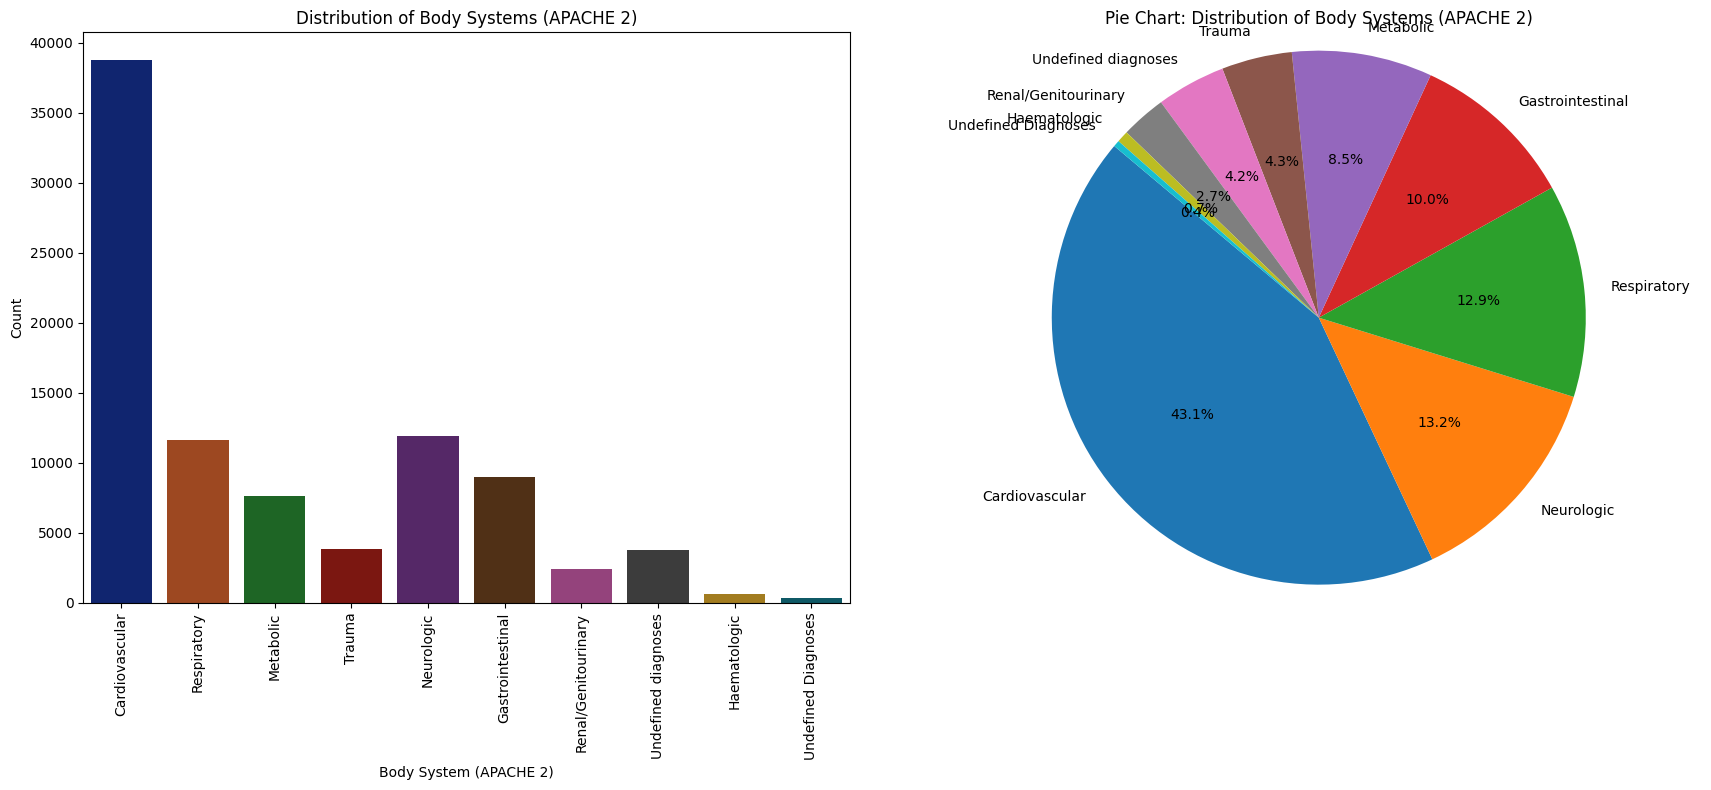

In [10]:

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=df, x='apache_2_bodysystem', palette="dark", ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)  
axs[0].set_xlabel('Body System (APACHE 2)')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Body Systems (APACHE 2)')

counts = df['apache_2_bodysystem'].value_counts()
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Pie Chart: Distribution of Body Systems (APACHE 2)')
axs[1].axis('equal')  
plt.tight_layout()
plt.show()


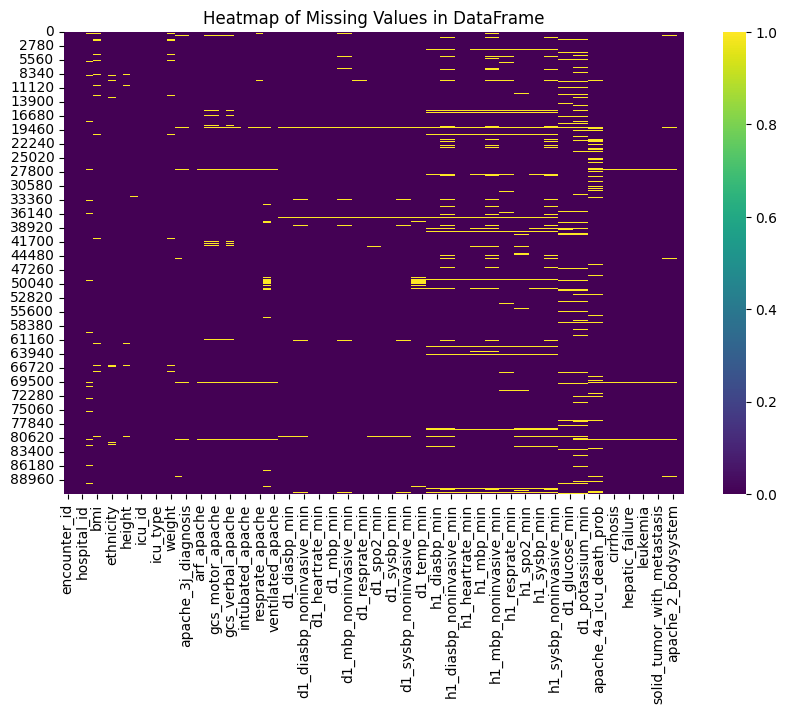

In [11]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Heatmap of Missing Values in DataFrame')
plt.show()



# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#85d07;">3. Build Model</p>**
1. **Split Data:**
   - Split the data into features (X) and target (y).

2. **Split Training and Validation Sets:**
   - Split the data into training and validation sets using a test size of 0.2 and a random state of 42.

3. **Define Transformers:**
   - Define a numeric transformer pipeline:
     - Impute missing values with median.
     - Scale features using StandardScaler.

   - Define a categorical transformer pipeline:
     - Impute missing values with a constant ('missing').
     - Perform one-hot encoding with handling of unknown categories.

4. **Define Preprocessor:**
   - Combine the numeric and categorical transformers using ColumnTransformer.

5. **Define Model Pipeline:**
   - Create a pipeline consisting of preprocessor and a Logistic Regression model.

6. **Fit Model:**
   - Fit the model pipeline on the training data.

7. **Evaluate Model:**
   - Calculate the accuracy of the model on the validation set.
   - Make predictions on the validation set.
9. ****
   


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression,LinearRegression


In [13]:
target = 'hospital_death'
numeric_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_features.remove(target)  
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [14]:

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])


In [15]:

X = df.drop(["hospital_death"],axis=1)
y = df['hospital_death']

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

model_pipeline.fit(X_train, y_train)
accuracy = model_pipeline.score(X_val, y_val)
y_pred = model_pipeline.predict(X_val)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:

print("Model: LogisticRegression" )
print("Accuracy:", accuracy)

Model: LogisticRegression
Accuracy: 0.9233721488071874


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#85d07;">4. Predict Patient Survival or Death</p>**

In [18]:

Dataset_row = df.iloc[[91611]]

if "hospital_death" in Dataset_row.columns:
    Dataset_row = Dataset_row.drop(columns=["hospital_death"])

# Make predictions
prediction = model_pipeline.predict(Dataset_row)
print("\n------------------------------------\n")
if prediction==0:
    print("\tPatient Death")
elif prediction==1:
    print("\tPatient Survivad")
print("\n------------------------------------")




------------------------------------

	Patient Survivad

------------------------------------


---

# **Summary**

In this notebook, we embarked on a journey to create a Logistic Regression model aimed at predicting patient survival or death. Our dataset encompassed 85 columns, consisting of 78 numeric features and 7 categorical features, providing a rich source of information for analysis.

### Approach
We began by combining the numeric and categorical transformers using ColumnTransformer for efficient preprocessing. Next, we built a pipeline that incorporated the preprocessing steps followed by the Logistic Regression model.

### Model Performance
Our Logistic Regression model exhibited strong predictive power, achieving an accuracy of approximately 92.34% on the validation set. This high accuracy underscores the model's effectiveness in predicting patient survival.

### Conclusion
This notebook showcases the successful development of a Logistic Regression model for predicting patient survival or death. With an accuracy of 92.34% on the validation set, the model holds promise for use in healthcare settings. By leveraging patient demographics, medical history, and vital signs, healthcare professionals can gain valuable insights into patient outcomes.

This project highlights the significance of data-driven approaches in healthcare, providing a tool that aids medical professionals in making informed decisions and delivering optimal patient care. The model's robust performance underscores its potential as a valuable asset in the realm of healthcare analytics.


<div id="badges" style="text-align: center; background-color: #333; padding: 10px; margin-bottom: 10px;">
    <a href="https://www.linkedin.com/feed/?trk=404_page" target="_blank" rel="noopener noreferrer">
        <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn Badge"/>
    </a>
</div>


<div id="badges" style="text-align: center; background-color: #333; padding: 10px; margin-bottom: 10px;">
    <a href="https://github.com/mshahzaib4/mshahzaib4" target="_blank" rel="noopener noreferrer">
        <img src="https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white" alt="GitHub Badge"/>
    </a>
</div>

<div id="badges" style="text-align: center; background-color: #333; padding: 10px; margin-bottom: 10px;">
    <a href="https://www.kaggle.com/shahzaibmalik44" target="_blank" rel="noopener noreferrer">
        <img src="https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle Badge"/>
    </a>
</div>


---